<ipython-input-4-7196e25b4ca7>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


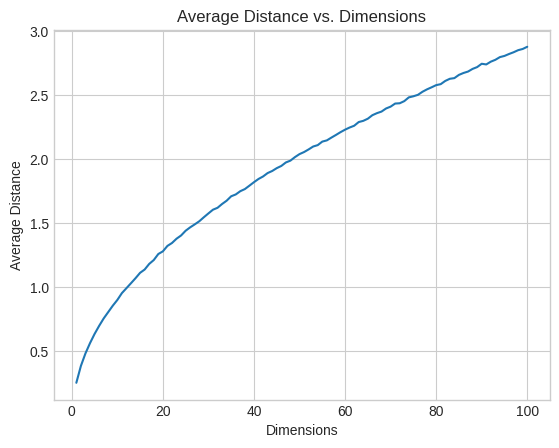

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dimensions = range(1, 101)
avg_distance = []

for dim in dimensions:
    point = np.random.rand(1000, dim)
    distances = np.sqrt(np.sum((point - np.mean(point, axis=0))**2, axis=1))
    avg_distance.append(np.mean(distances))

plt.style.use('seaborn-whitegrid')
plt.plot(dimensions, avg_distance)
plt.xlabel('Dimensions')
plt.ylabel('Average Distance')
plt.title('Average Distance vs. Dimensions')
plt.show()


**Explanation:**

Data Generation: For each dimension (from 1 to 100), the code generates
1,000 random points.

Distance Calculation: It calculates the average distance of these points from the mean of all points in that dimensional space.

Observation: The plot shows that as the number of dimensions increases, the average distance between points increases. This is a visual demonstration of one aspect of the "curse of dimensionality" — in high-dimensional spaces, points tend to become uniformly distant from each other, making distance-based algorithms (like KNN) less effective.

# Classifier Example: How does the accuracy of a K-Nearest Neighbors (KNN) classifier change as the number of dimensions (features) increase in a dataset?

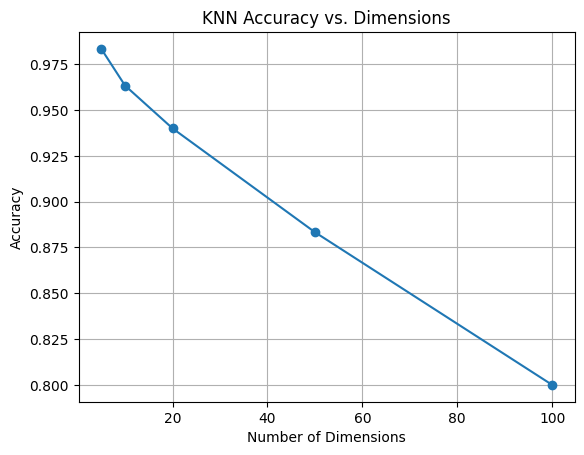

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Number of informative features is fixed at 5
n_informative = 5
n_samples = 1000  # Number of data points to generate

# List of dimensions to test
dimensions = [5, 10, 20, 50, 100]

# List to store accuracy results for each dimensionality
accuracy = []

# Loop over the different dimensionalities
for dim in dimensions:
    # Generate a synthetic dataset
    # n_features = dim means the total number of features (columns) in the dataset
    # n_informative = 5 means only 5 of these features will actually be useful in predicting the target variable
    X, y = make_classification(n_samples=n_samples, n_features=dim, n_informative=n_informative, n_redundant=0, n_clusters_per_class=1, random_state=42)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the K-Nearest Neighbors (KNN) classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Train the KNN classifier on the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the classifier and store it in the accuracy list
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot the accuracy against the number of dimensions
plt.plot(dimensions, accuracy, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Dimensions')
plt.grid(True)
plt.show()


Explantion: We use the make_classification function to generate synthetic datasets with a fixed number of informative features (5), but the total number of features (dimensions) varies. Out of all features, only 5 are useful for predicting the outcome, while the rest are irrelevant. The dataset is split into training (70%) and testing (30%) sets. We use a KNN classifier, which is a simple algorithm that classifies a data point based on the majority class among its nearest neighbors. The model's accuracy is calculated on the test data and stored for each dimension.
The graph is a visual representation of accuracy against the number of dimensions.

As the number of dimensions increases, especially beyond the number of informative features, the model's accuracy typically decreases. This is because the additional dimensions add noise rather than useful information, which can confuse the model.

# Feature Selection Example Using Recursive Feature Elimination (RFE)

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features (independent variables)
y = data.target  # Target (dependent variable)

# Initialize a linear regression model
model = LinearRegression()

# Initialize Recursive Feature Elimination (RFE)
# This will select the top 5 most important features
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE model on the data
rfe.fit(X, y)

# Extract the names of the selected features
selected_features = np.array(data.feature_names)[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: ['MedInc' 'AveRooms' 'AveBedrms' 'Latitude' 'Longitude']


Explantion: The code automatically selects the most important features that contribute the most to predicting the target variable using a method called Recursive Feature Elimination (RFE). We use the California Housing dataset, which contains features like median income, house age, etc., to predict house prices.

We initialize a simple linear regression model. RFE is applied to this model to recursively eliminate the least important features until only the top 5 most important ones are left.

These are the features (the output) that the RFE algorithm determined to be most important for predicting the target variable (house prices). This process is useful because it reduces the dimensionality of the dataset, helping to prevent overfitting and improve model performance.

# Feature Extraction Example Using Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

# Print the amount of variance explained by the selected components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.25336868 0.23516245]


Explanation: This code demonstrates how to reduce the dimensionality of data using Principal Component Analysis (PCA), a technique that transforms the original features into a smaller set of new features (called principal components) while retaining most of the information.

We first standardize the features to ensure they all have the same scale, which is essential for PCA to work effectively. PCA is initialized to reduce the dataset to 2 components. It identifies the directions (principal components) in which the data varies the most and projects the data onto these directions.

Output: These values (variance ratio) show how much of the original dataset’s variability is retained by the principal components. Ideally, you want a high percentage of variance explained by fewer components, indicating that you can reduce the dataset's dimensionality without losing much information.

**First Principal Component** (0.25336868): This component explains approximately 25.34% of the total variance in the dataset.

**Second Principal Component** (0.23516245): This component explains about 23.52% of the total variance.

If you add these two numbers together, you'll find that the first two principal components together explain around 48.87% of the total variance in the data.